In [183]:
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
df_ibovespa = pd.read_csv("/content/Dados Históricos - Ibovespa (1).csv")

In [185]:
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.01.2024,131.972,132.023,132.215,131.033,"5,23M","-0,04%"
1,05.01.2024,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2,04.01.2024,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
3,03.01.2024,132.834,132.697,133.576,132.250,"8,70M","0,10%"
4,02.01.2024,132.697,134.186,134.195,132.095,"8,44M","-1,11%"


In [186]:
df_ibovespa.tail() # tentei baixar o dataframe a partir de 1994, porém a primeira entrada que apareceu é do final dos anos 2000

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1239,11.01.2019,93.658,93.806,93.961,93.359,"5,50M","-0,16%"
1240,10.01.2019,93.806,93.599,93.987,93.050,"4,99M","0,21%"
1241,09.01.2019,93.613,92.033,93.626,92.028,"5,17M","1,72%"
1242,08.01.2019,92.032,91.699,92.231,91.064,"4,64M","0,36%"
1243,07.01.2019,91.699,91.845,92.552,91.288,"4,71M","-0,15%"


In [187]:
df_ibovespa.shape

(1244, 7)

In [188]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1244 non-null   object 
 1   Último    1244 non-null   float64
 2   Abertura  1244 non-null   float64
 3   Máxima    1244 non-null   float64
 4   Mínima    1244 non-null   float64
 5   Vol.      1244 non-null   object 
 6   Var%      1244 non-null   object 
dtypes: float64(4), object(3)
memory usage: 68.2+ KB


In [189]:
df_ibovespa["Data"] = pd.to_datetime(df_ibovespa["Data"], dayfirst=True) # transformando a coluna de data em datetime

In [190]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1244 non-null   datetime64[ns]
 1   Último    1244 non-null   float64       
 2   Abertura  1244 non-null   float64       
 3   Máxima    1244 non-null   float64       
 4   Mínima    1244 non-null   float64       
 5   Vol.      1244 non-null   object        
 6   Var%      1244 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 68.2+ KB


In [191]:
#df_inves = df_ibovespa.set_index("Data")

In [192]:
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-01-08,131.972,132.023,132.215,131.033,"5,23M","-0,04%"
1,2024-01-05,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2,2024-01-04,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
3,2024-01-03,132.834,132.697,133.576,132.250,"8,70M","0,10%"
4,2024-01-02,132.697,134.186,134.195,132.095,"8,44M","-1,11%"


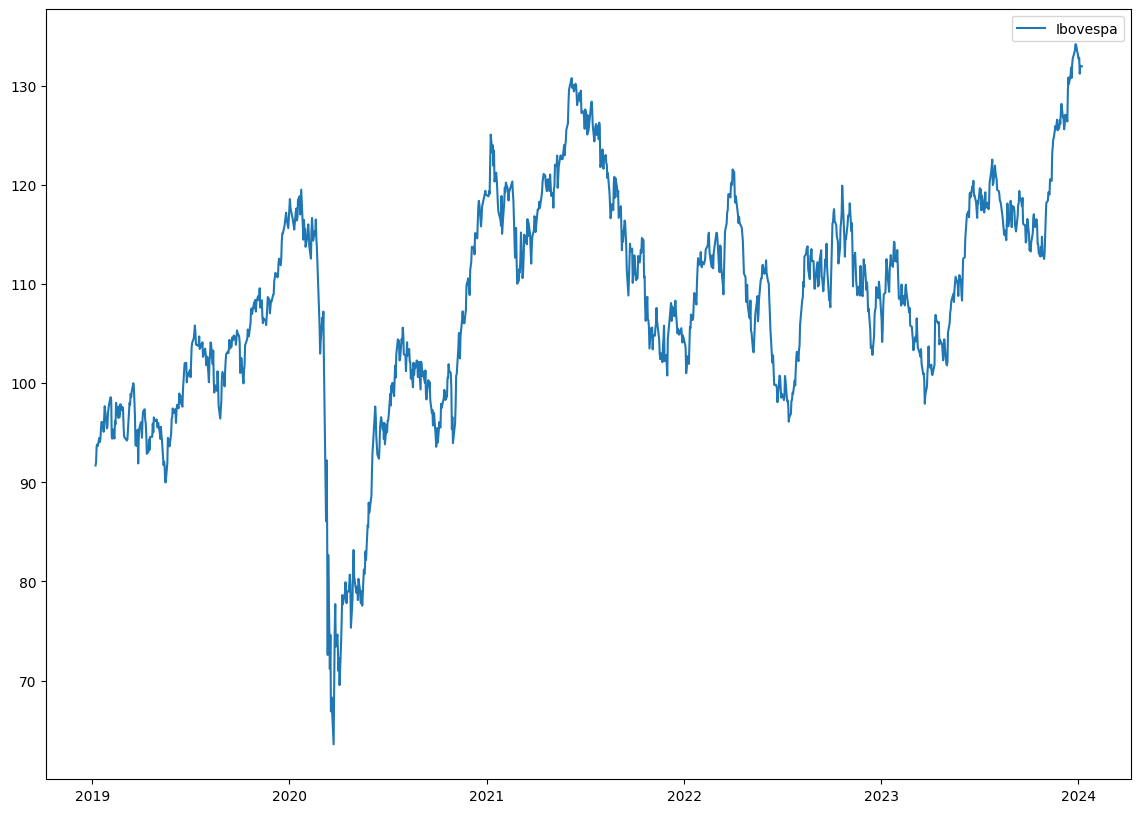

In [194]:
plt.figure(figsize = (14,10))
plt.plot(df_ibovespa['Data'], df_ibovespa['Último'], label='Ibovespa')

plt.legend(loc='best')
plt.show()

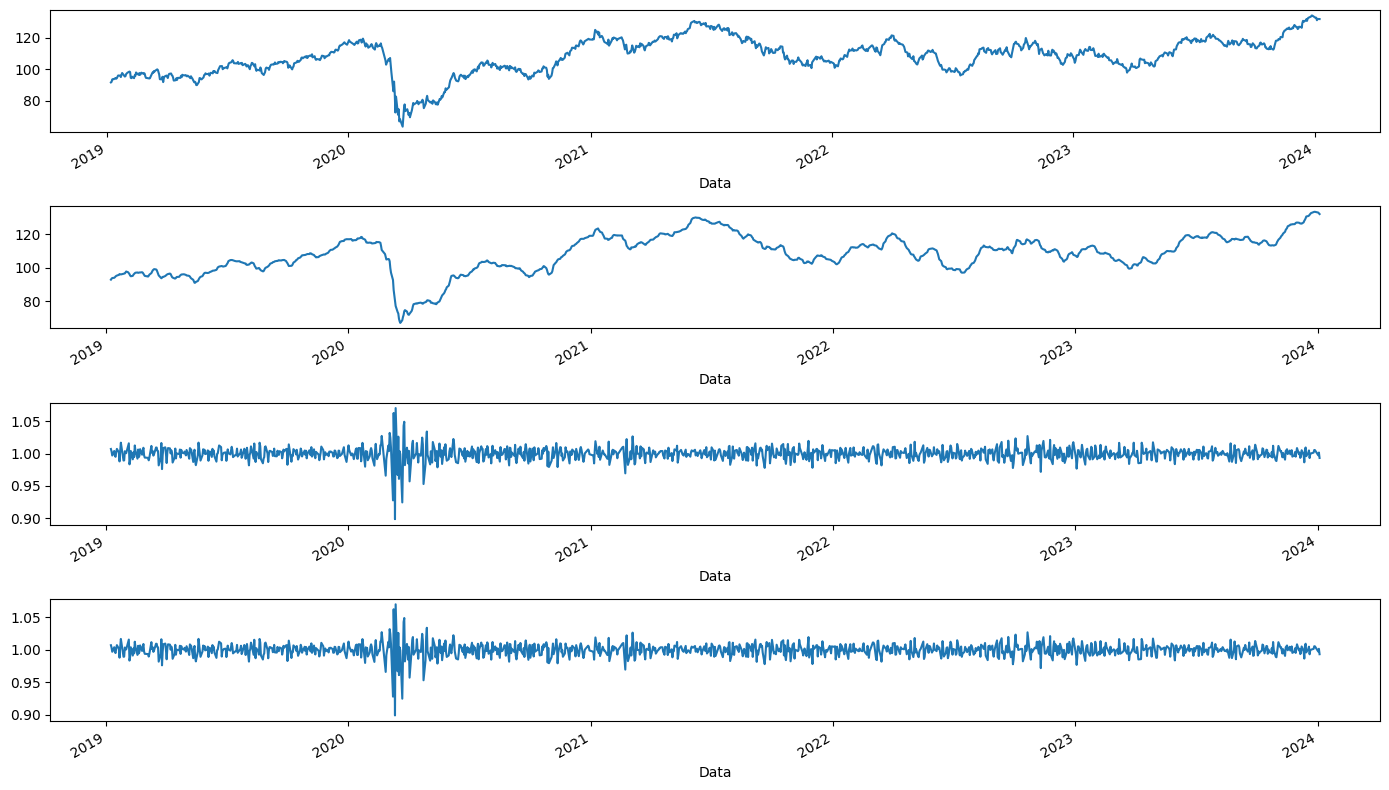

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = df_ibovespa
df = df_ibovespa.drop(columns=["Abertura", "Máxima", "Mínima", "Vol.", "Var%"])
df = df.set_index("Data")


seasonplot = seasonal_decompose(df, model='multiplicative', period=5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2) #tendencia
seasonplot.resid.plot(ax=ax3) #sazonalidade
seasonplot.resid.plot(ax=ax4) #residuos
plt.tight_layout()